<a href="https://colab.research.google.com/github/Aritro30/CPSC533R_Assignment_1/blob/main/CPSC533R_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CPSC 533R Visual AI - Assignment 1

Task I-III

In [ ]:
# Install environment according to the readme.md or use google colab

In [1]:
# import standard PyTorch modules
import torch
import torch.nn as nn
import torch.optim as optim

# import torchvision module to handle image manipulation
import torchvision
import torchvision.transforms as transforms
print("Running on torch.__version__ = ", torch.__version__)

Running on torch.__version__ =  1.11.0+cu113


In [ ]:
# Use standard FashionMNIST dataset

# helper function to make gray-scale images the same shape as color images
def gray_to_color(x):
    return x.repeat(3, 1, 1)

# select the MNIST or FashionMNIST dataset
#train_set = torchvision.datasets.FashionMNIST(
train_set = torchvision.datasets.MNIST(
    root = './DatasetMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor(),
        gray_to_color,
    ])
)

train_set = FDataset()
loader = torch.utils.data.DataLoader(train_set, batch_size = 8, num_workers=0)


In [ ]:
class FDataset(Dataset):
    def __init__(self):
        self.train_set = torchvision.datasets.MNIST(
    root = './DatasetMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor(),
        gray_to_color,
    ])
)
    def __len__(self):
        return len(self.train_set)

    def __getitem__(self, idx):
        dict = {}
        dict["img"] = self.train_set[idx][0] 
        dict["class"] = torch.tensor(self.train_set[idx][1])
        return dict

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2352, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, input_dict):
        dict = {}
        img = input_dict
        x = self.flatten(img)
        output_class = self.linear_relu_stack(x)
        dict["class"] = output_class
        return dict

In [ ]:
model = NeuralNetwork()


In [ ]:
# training loop
losses = []
iterator = iter(loader)
optimizer = optim.SGD(network.parameters(), lr=0.001)

for i in range(200): #range(len(loader)):
    batch = next(iterator)
    preds = model(batch["img"])["class"]
    loss = nn.functional.cross_entropy(preds, batch["class"])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if i%10==0:
        print(i,losses[-1])

0 2.2981343269348145
10 2.3184733390808105
20 2.303462266921997
30 2.3183681964874268
40 2.3200600147247314
50 2.291445732116699
60 2.2813549041748047
70 2.2962000370025635
80 2.2997243404388428
90 2.3008344173431396
100 2.2930994033813477
110 2.2937798500061035
120 2.293713331222534
130 2.302931547164917
140 2.290647268295288
150 2.3115055561065674
160 2.280858278274536
170 2.3101279735565186
180 2.2891626358032227
190 2.288738250732422


Task IV-VII

In [5]:
import random 
class FDataset():
    def __init__(self):
        self.train_set = torchvision.datasets.MNIST(
    root = './DatasetMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor(),
        gray_to_color,
    ])
)
    def __len__(self):
        return len(self.train_set)

    def __getitem__(self, idx1):
        dict = {}
        label = 0
        idx2 = random. randint(0,100)
        dict["img1"] = self.train_set[idx1][0]
        dict["img2"] = self.train_set[idx2][0]
        if self.train_set[idx1][1] == self.train_set[idx2][1]:
          label = 1
        dict["label"] = label
        return dict

In [6]:
training_set = FDataset()
train_set, val_set = torch.utils.data.random_split(training_set, [int(80*len(training_set)/100), int(20*len(training_set)/100)])
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 10, num_workers=0)
val_loader = torch.utils.data.DataLoader(val_set, batch_size = 10, num_workers=0)

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2352*2, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 2),
        )

    def forward(self, img1, img2):
        dict = {}
        x1 = self.flatten(img1)
        x2 = self.flatten(img2)
        x = torch.cat((x1,x2),1) 
        output_class = self.linear_relu_stack(x)
        dict["label"] = output_class
        return dict

In [8]:
model = NeuralNetwork()


In [ ]:
def calc_accuracy(preds,label):
  return len(label)-torch.sum(torch.abs(label - torch.max((preds),1)[1])), len(label)
  #return ((100*(len(label)-torch.sum(torch.abs(label - torch.max((preds),1)[1])))/len(label)).item())
  

epochs = 5
for epoch in range(epochs):
  # training loop
  losses = []
  iterator1 = iter(train_loader)
  iterator2 = iter(val_loader)
  # print(len(val_loader))
  # raise Exception()
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  #for i in range(1):
  
  for k in range(len(train_loader)): #range(len(loader)):
      #print(k)
      #raise Exception()
      batch = next(iterator1)
      preds = model(batch["img1"],batch["img2"])["label"]
      loss = nn.functional.cross_entropy(preds, batch["label"])
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      losses.append(loss.item())
      # if i%100==0:
      #     print(i,losses[-1])
  total_cor, total_bat = 0,0
  #for j in range(1):
  for j in range(len(val_loader)): #range(len(loader)):
      batch_val = next(iterator2)
      preds_val = model(batch_val["img1"],batch_val["img2"])["label"]
      
      cor, bat = calc_accuracy(preds_val,batch_val["label"])
      total_cor+=cor
      total_bat+=bat
  print("Validation Accuracy:",100*total_cor/total_bat)
  print("----------------")    


Validation Accuracy: tensor(92.9333)
----------------
Validation Accuracy: tensor(94.1500)
----------------
Validation Accuracy: tensor(94.8500)
----------------
Validation Accuracy: tensor(96.3417)
----------------
Validation Accuracy: tensor(96.3000)
----------------


Task VIII-X

In [21]:
import matplotlib.pyplot as plt
batch_size = 10
def visualize_batch(batch, preds):
  print(preds.shape)
  classes = (torch.argmax(preds, dim=1))
  for i in range(batch_size):
    plt.imshow(batch['img1'][i].permute(1, 2, 0) )
    plt.show()
    plt.imshow(batch['img2'][i].permute(1, 2, 0) )
    plt.show()
    print(classes[i].item())
    print("-------------------------------")

Validation Accuracy: tensor(94.6417)
----------------
torch.Size([10, 2])


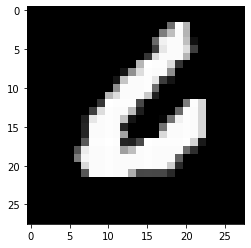

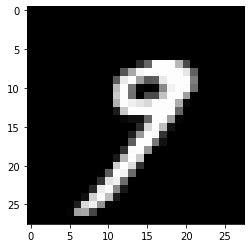

0
-------------------------------


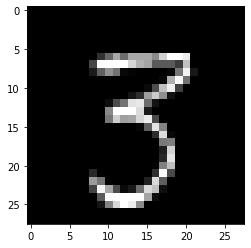

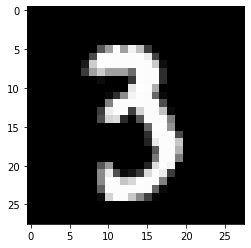

0
-------------------------------


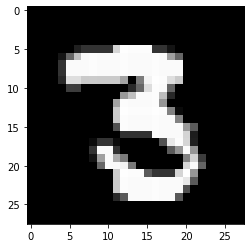

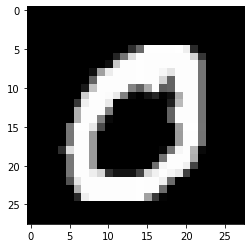

0
-------------------------------


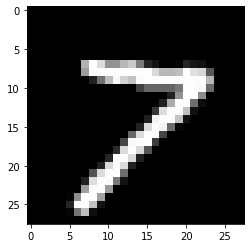

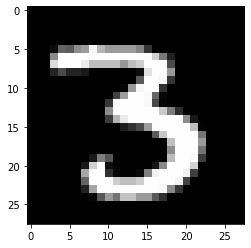

0
-------------------------------


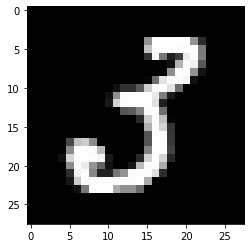

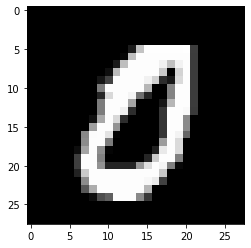

0
-------------------------------


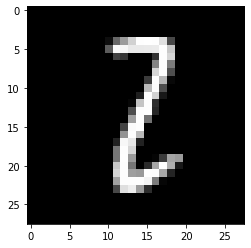

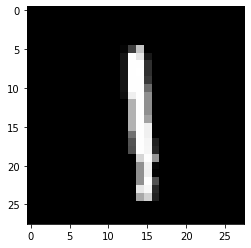

0
-------------------------------


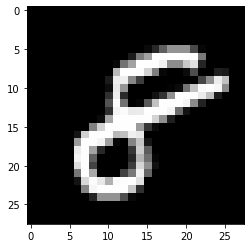

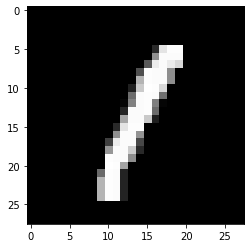

0
-------------------------------


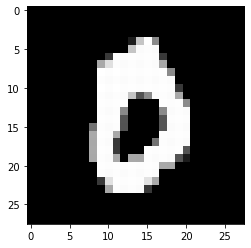

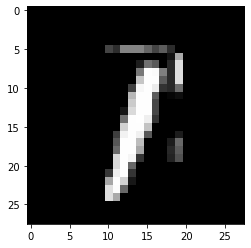

0
-------------------------------


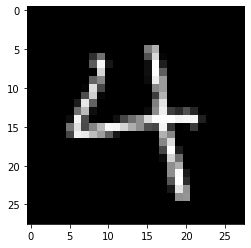

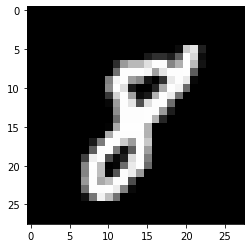

0
-------------------------------


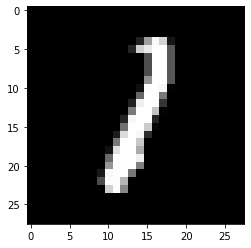

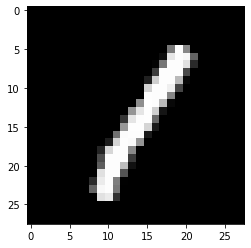

1
-------------------------------
torch.Size([10, 2])


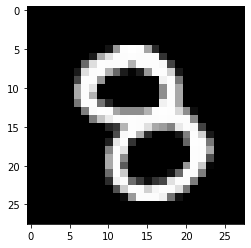

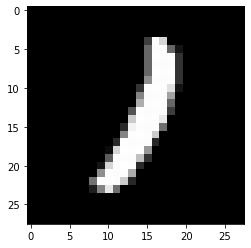

0
-------------------------------


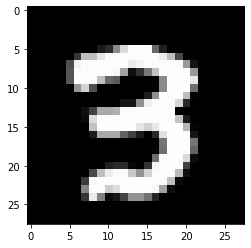

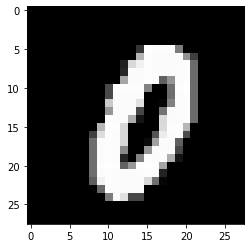

0
-------------------------------


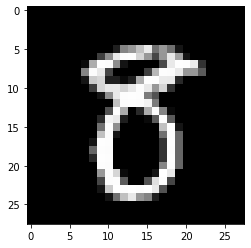

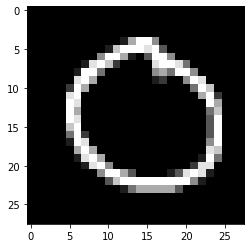

0
-------------------------------


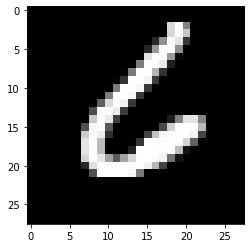

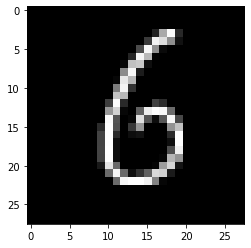

1
-------------------------------


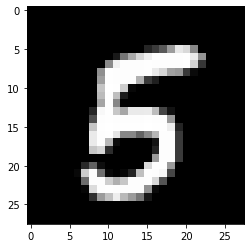

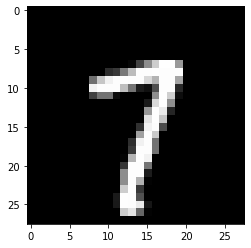

0
-------------------------------


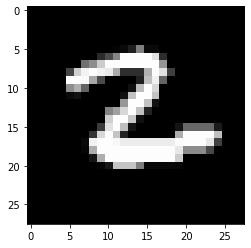

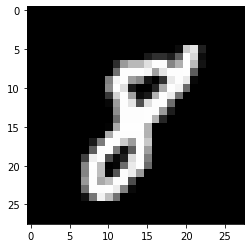

0
-------------------------------


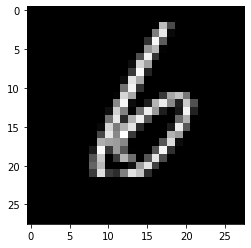

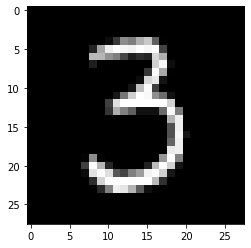

0
-------------------------------


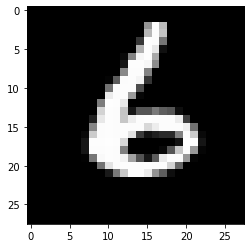

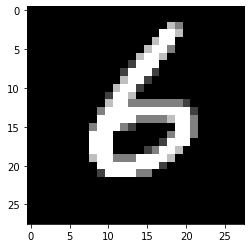

1
-------------------------------


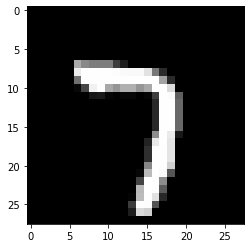

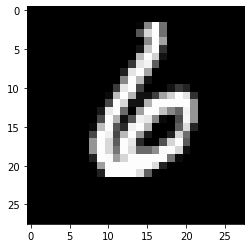

0
-------------------------------


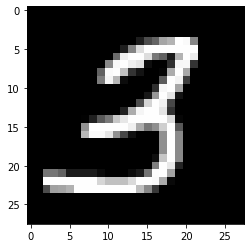

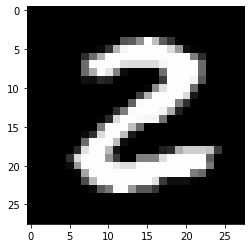

0
-------------------------------
Validation Accuracy: tensor(95.3167)
----------------


In [22]:
def calc_accuracy(preds,label):
  return len(label)-torch.sum(torch.abs(label - torch.max((preds),1)[1])), len(label)
  #return ((100*(len(label)-torch.sum(torch.abs(label - torch.max((preds),1)[1])))/len(label)).item())
  

epochs = 2
for epoch in range(epochs):
  # training loop
  losses = []
  iterator1 = iter(train_loader)
  iterator2 = iter(val_loader)
  # print(len(val_loader))
  # raise Exception()
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  #for i in range(1):
  
  for k in range(len(train_loader)): #range(len(loader)):
      batch = next(iterator1)
      preds = model(batch["img1"],batch["img2"])["label"]
      loss = nn.functional.cross_entropy(preds, batch["label"])
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      losses.append(loss.item())
      if epoch == 1 and k == 100:
        visualize_batch(batch, preds)
      # if i%100==0:
      #     print(i,losses[-1])
  total_cor, total_bat = 0,0
  #for j in range(1):
  for j in range(len(val_loader)): #range(len(loader)):
      batch_val = next(iterator2)
      preds_val = model(batch_val["img1"],batch_val["img2"])["label"]
      
      cor, bat = calc_accuracy(preds_val,batch_val["label"])
      total_cor+=cor
      total_bat+=bat
      if epoch == 1 and j == 100:
        visualize_batch(batch_val, preds_val)
  print("Validation Accuracy:",100*total_cor/total_bat)
  print("----------------")    


In [27]:
import matplotlib.pyplot as plt
def plot_graph_val(epoch, val_loss):
    
  plt.plot(epoch, val_loss)
  plt.title('Validation Loss Vs Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Validation Loss')
  plt.show()
def plot_graph_train(epoch, train_loss):
    
  plt.plot(epoch, train_loss)
  plt.title('Training Loss Vs Iterations')
  plt.xlabel('Iterations')
  plt.ylabel('Training Loss')
  plt.show()

In [ ]:
def calc_accuracy(preds,label):
  return len(label)-torch.sum(torch.abs(label - torch.max((preds),1)[1])), len(label)
  #return ((100*(len(label)-torch.sum(torch.abs(label - torch.max((preds),1)[1])))/len(label)).item())
  

epochs = 10
epoch_list = []
iter_list = []
val_loss = []
train_loss = []
count = 0
for epoch in range(epochs):
  # training loop
  losses = []
  iterator1 = iter(train_loader)
  iterator2 = iter(val_loader)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  for k in range(len(train_loader)): #range(len(loader)):
      batch = next(iterator1)
      preds = model(batch["img1"],batch["img2"])["label"]
      loss = nn.functional.cross_entropy(preds, batch["label"])
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      losses.append(loss.item())
      train_loss.append(loss.item())
      iter_list.append(count)
      count+=1
  v_loss_list = []
  for j in range(len(val_loader)): #range(len(loader)):
      batch_val = next(iterator2)
      preds_val = model(batch_val["img1"],batch_val["img2"])["label"]
      v_loss = nn.functional.cross_entropy(preds_val, batch_val["label"])
      v_loss_list.append(v_loss.item())
  val_loss.append(sum(v_loss_list)/len(v_loss_list))
  epoch_list.append(epoch)

plot_graph_val(epoch_list, val_loss)
plot_graph_train(iter_list, train_loss)